In [6]:
politica = []
farandula = []
deportes = []

with open("deportes.txt", encoding='latin1') as f:
    text = f.read()
    deportes = text.split("===")

with open("farandula.txt", encoding='latin1') as f:
    text = f.read()
    farandula = text.split("===")

with open("politica.txt", encoding='latin1') as f:
    text = f.read()
    politica = text.split("===")
print(len(deportes))
print(len(farandula))
print(len(politica))


15
5
6


In [7]:
print(politica)

['\nEl mandatario de Brasil, Luiz InÃ¡cio Lula da Silva, y el presidente de Chile, Gabriel Boric, se comprometieron a superar las diferencias polÃ\xadticas con el presidente electo de Argentina, Javier Milei, en un aparente intento por lograr una relaciÃ³n de trabajo tras meses de tensiÃ³n.\n\nâ\x80\x9cVamos a tener problemas polÃ\xadticos en SudamÃ©rica, pero, en lugar de quejarnos, tenemos que ser inteligentes y tratar de solucionarlos, tratar de hablar y tratar de converger democrÃ¡ticamente en la adversidadâ\x80\x9d, dijo Lula el martes durante un evento en la sede del Ministerio de Relaciones Exteriores de Brasil. â\x80\x9cNo me tiene que gustar el presidente de Chile, de Argentina, de Venezuelaâ\x80\x9d, advirtiÃ³. â\x80\x9cNo tiene que ser mi amigo. Ã\x89l tiene que ser presidente de su paÃ\xads y yo tengo que ser presidente del mÃ\xadoâ\x80\x9d.\n\nY aÃ±adiÃ³: â\x80\x9cNos tenemos que sentar a defender cada uno sus intereses. Sin dominio del uno sobre el otro, tenemos que llega

In [8]:
import spacy
import numpy as np

In [9]:
def extract_embedding(text: str, nlp: spacy.Language) -> np.ndarray:
    doc = nlp(text)
    return doc.vector

In [11]:
import spacy
nlp = spacy.load("es_core_news_md")

texts = farandula + politica + deportes
embeddings = np.array([extract_embedding(text, nlp) for text in texts])
embeddings[:4, :]

array([[ 1.3635294 ,  1.4339517 ,  0.24277374, ...,  0.90325785,
        -0.11891946,  0.40540504],
       [ 1.6136994 ,  1.1438283 ,  0.2857962 , ...,  0.8949072 ,
        -0.01441681,  0.29641795],
       [ 1.3052074 ,  1.0977217 , -0.26316088, ...,  1.0311143 ,
        -0.2509036 ,  0.4767858 ],
       [ 1.8199965 ,  1.2106298 ,  0.44170964, ...,  0.7811128 ,
        -0.09209421,  0.4312242 ]], dtype=float32)

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)
embeddings_3d.shape

(26, 3)

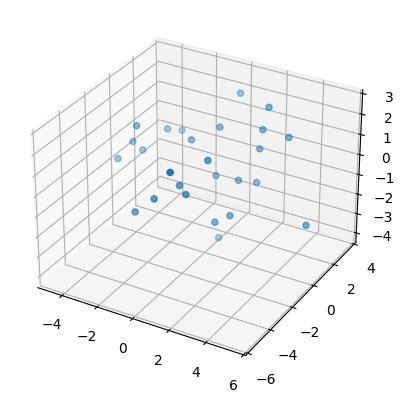

In [14]:
fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
)

In [15]:
color = [2 for i in farandula] + [3 for i in politica] + [4 for i in deportes]
color

[2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [16]:
pca2 = PCA(n_components=2)
embeddings_2d = pca2.fit_transform(embeddings)

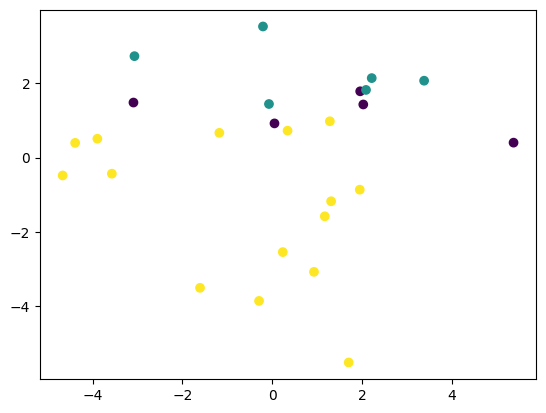

In [17]:
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1],c=color)

In [18]:
embeddings.shape

(26, 300)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similarity(emb1: np.ndarray, emb2: np.ndarray) -> float:
    return cosine_similarity([emb1], [emb2])[0][0]

In [77]:
find_similarity(embeddings[3], embeddings[3])

np.float32(1.0000001)

In [43]:
def find_top_similar(index: int, embeddings: np.ndarray, n: int) -> list:
    similarities = [find_similarity(embeddings[index], embeddings[i]) for i in range(embeddings.shape[0])]
    return np.argsort(similarities)[::-1][1:n+1]

In [44]:
find_top_similar(0, embeddings, 5)

array([ 6,  9, 22,  5, 10])

In [89]:
def find_most_similar_bet_cat(embs1: np.ndarray, embs2: np.ndarray) -> list:
    pairs = [(i,j) for i in range(embs1.shape[0]) for j in range(embs2.shape[0])]
    similarities = [(find_similarity(embs1[i], embs2[j])) for i,j in pairs]
    return pairs[np.argsort(similarities, axis=0)[::-1][0]]

In [87]:
emb_farandula = np.array(embeddings[:len(farandula)])
emb_deportes = np.array(embeddings[len(farandula):len(farandula)+len(deportes)])
emb_politica = np.array(embeddings[len(farandula)+len(deportes):])

In [90]:
find_most_similar_bet_cat(emb_farandula, emb_politica)

(0, 2)